In [43]:
import numpy as np

# Charger le fichier npz
data = np.load("../data/cifar100.npz")

x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 64, 64, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 64, 64, 3)
y_test shape: (10000, 1)


In [45]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [36]:
import numpy as np
import pickle

# --- Charger CIFAR-100 ---
def load_cifar100_batch(path):
    with open(path, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

train = load_cifar100_batch("../data/cifar-100-python/train")
test  = load_cifar100_batch("../data/cifar-100-python/test")
meta  = load_cifar100_batch("../data/cifar-100-python/meta")

x_train = train['data'].reshape(-1, 3, 32, 32).transpose(0,2,3,1)
y_train = np.array(train['fine_labels'])

x_test = test['data'].reshape(-1, 3, 32, 32).transpose(0,2,3,1)
y_test = np.array(test['fine_labels'])

class_names = meta['fine_label_names']

# --- Classes à garder ---
selected_classes = [
    'bottle','bowl','can','cup','plate',
    'apple','mushroom','orange','pear','sweet_pepper',
    'clock','keyboard','lamp','telephone','television',
    'bed','chair','couch','table','wardrobe',
    'bicycle','bus','motorcycle','pickup_truck','train',
    'lawn_mower','rocket','streetcar','tank','tractor'
]

# Convertir en indices CIFAR-100
selected_indices = [class_names.index(c) for c in selected_classes]

# --- Filtrer les données ---
mask_train = np.isin(y_train, selected_indices)
mask_test  = np.isin(y_test, selected_indices)

x_train_filtered = x_train[mask_train]
y_train_filtered = y_train[mask_train]

x_test_filtered = x_test[mask_test]
y_test_filtered = y_test[mask_test]

print("Train filtré :", x_train_filtered.shape, y_train_filtered.shape)
print("Test filtré  :", x_test_filtered.shape, y_test_filtered.shape)

# --- Facultatif : remapper labels 0..29 ---
#new_label_map = {old: i for i, old in enumerate(selected_indices)}
#y_train_filtered = np.array([new_label_map[y] for y in y_train_filtered])
#y_test_filtered  = np.array([new_label_map[y] for y in y_test_filtered])

print("Nouveaux labels train :", np.unique(y_train_filtered))
print("Nouveaux labels test  :", np.unique(y_test_filtered))


Train filtré : (15000, 32, 32, 3) (15000,)
Test filtré  : (3000, 32, 32, 3) (3000,)
Nouveaux labels train : [ 0  5  8  9 10 13 16 20 22 25 28 39 40 41 48 51 53 57 58 61 69 81 83 84
 85 86 87 89 90 94]
Nouveaux labels test  : [ 0  5  8  9 10 13 16 20 22 25 28 39 40 41 48 51 53 57 58 61 69 81 83 84
 85 86 87 89 90 94]


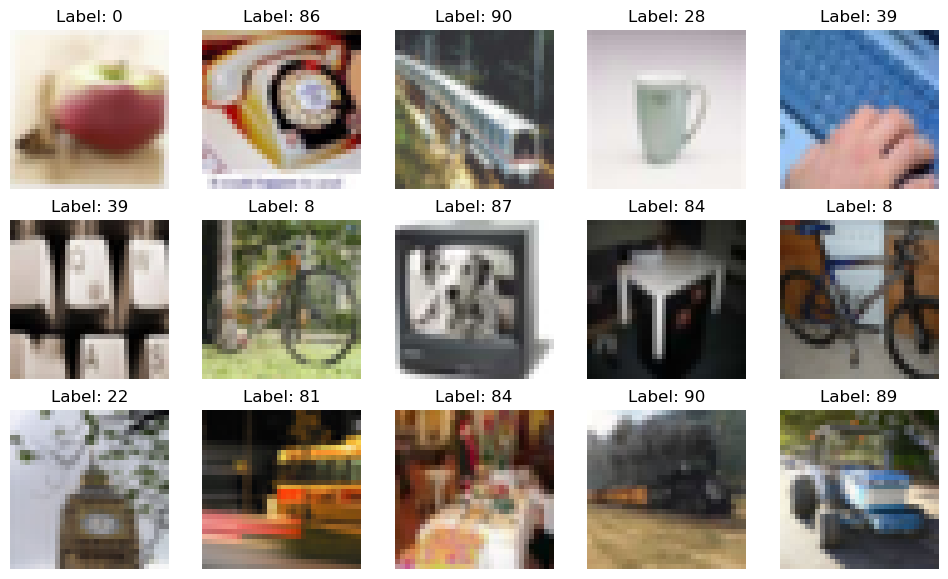

In [37]:
import matplotlib.pyplot as plt

# Afficher un petit échantillon
fig, axes = plt.subplots(3, 5, figsize=(12, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_filtered[i])
    ax.set_title(f"Label: {y_train_filtered[i]}")
    ax.axis('off')
plt.show()


    label  count
0       0    500
1       5    500
2       8    500
3       9    500
4      10    500
5      13    500
6      16    500
7      20    500
8      22    500
9      25    500
10     28    500
11     39    500
12     40    500
13     41    500
14     48    500
15     51    500
16     53    500
17     57    500
18     58    500
19     61    500
20     69    500
21     81    500
22     83    500
23     84    500
24     85    500
25     86    500
26     87    500
27     89    500
28     90    500
29     94    500


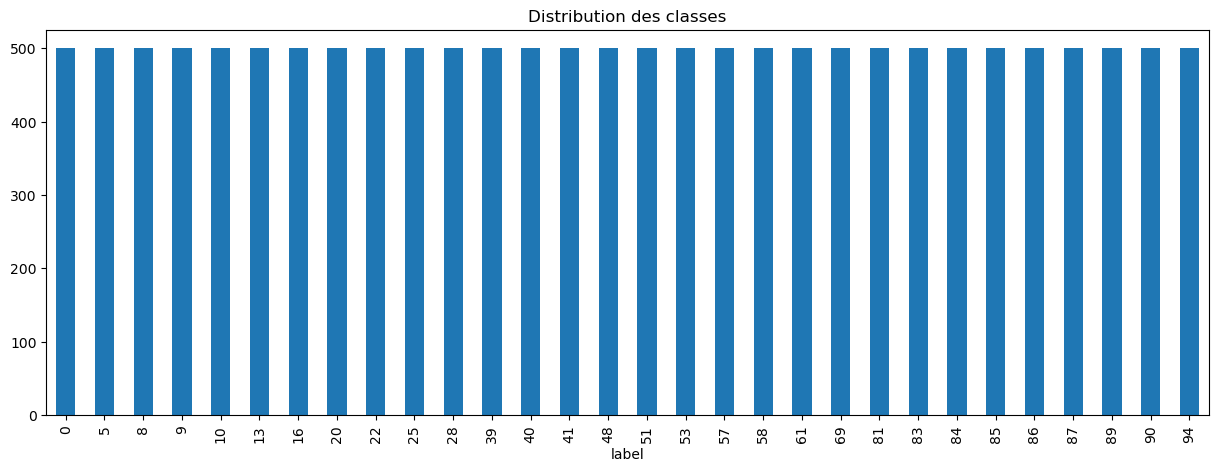

In [38]:
import pandas as pd

# Compter combien d'exemples par classe
unique, counts = np.unique(y_train_filtered, return_counts=True)
df = pd.DataFrame({'label': unique, 'count': counts})
print(df)

# Visualiser la distribution des classes
df.plot(kind='bar', x='label', y='count', figsize=(15,5), legend=False, title="Distribution des classes")
plt.show()


Les images sont deja normalisées

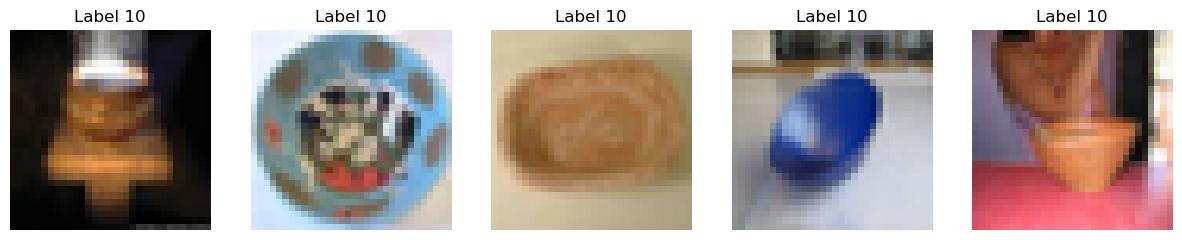

In [40]:
import matplotlib.pyplot as plt

def show_class_images(class_id, n=5):
    idxs = np.where(y_train_filtered == class_id)[0][:n]
    fig, axes = plt.subplots(1, n, figsize=(15,3))
    for i, ax in enumerate(axes):
        ax.imshow(x_train_filtered[idxs[i]])
        ax.axis('off')
        ax.set_title(f"Label {class_id}")
    plt.show()

show_class_images(10)  # Exemple pour la classe 10
